In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json

In [2]:
class Loader:
    def __init__(self, page_file, sec_file):
        self.docs_rating = {}
        with open(page_file) as json_file:
            data = json.load(json_file)
            max_r = 0
            for p in data['pages']:
                if max_r < p['rank']:
                    max_r = p['rank']
            for p in data['pages']:
                self.docs_rating[p['page_id']] = p['rank'] * (1/max_r)
        pages_dict = {}
        with open(sec_file) as json_file:
            data = json.load(json_file)
            for p in data['sections']:
                pages_dict[p['page_id']] = []
            for p in data['sections']:
                pages_dict[p['page_id']].append({'sec_id': p['section_id'], 'rank': p['rank']})

        self.pages = []
        max_sum = 0
        for page_id, section_vals in pages_dict.items():
            r_sum = 0
            for secs in section_vals:
                r_sum += secs['rank']
            if max_sum < r_sum:
                max_sum = r_sum
        fac = 1/max_sum
        for page_id, section_vals in pages_dict.items():
            r_sum = 0
            r_max = 0
            for secs in section_vals:
                if secs['rank'] > r_max:
                    r_max = secs['rank']
                r_sum += secs['rank']
            self.pages.append({'p_id': page_id, 'r_left': (r_sum-r_max)*fac, 'r_max': r_max*fac, 'r_sum': r_sum*fac})
        self.pages = sorted(self.pages, key=lambda k: k['r_sum'], reverse=True)
        
        self.p_ids = []
        self.r_leftovers = []
        self.r_max = []

        self.total_pange_rank = []

        for p in self.pages:
            self.p_ids.append(p['p_id'])
            self.r_leftovers.append(p['r_left'])
            self.r_max.append(p['r_max'])
            self.total_pange_rank.append(self.docs_rating[p['p_id']])
        
    def show_only_sec_sorted_by_sum(self, number_pages, save_name):
        N = number_pages
        ind = np.arange(N)
        width = 0.35       # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots()
        p1 = ax.bar(ind, self.r_max[0:N], width)
        p2 = ax.bar(ind, self.r_leftovers[0:N], width, bottom=self.r_max[0:N])

        plt.ylabel('Rating')
        plt.xlabel('Doc id')
        plt.title('Top 10 Ratings of single sections sorted by sum of ratings')
        plt.xticks(ind, self.p_ids[0:N])
        plt.legend((p1[0], p2[0]), ('max rating sec', 'remain rating sec'))
        
        plt.savefig("graphs/" + save_name + "_only_sec.pdf")
        plt.show()
    
    def show_together_sorted_by_sum(self, number_pages, save_name):
        N = number_pages
        ind = np.arange(N)
        width = 0.35       # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots()
        p1 = ax.bar(ind, self.r_max[0:N], width)
        p2 = ax.bar(ind, self.r_leftovers[0:N], width, bottom=self.r_max[0:N])
        p3 = ax.bar(ind+width, self.total_pange_rank[0:N], width)

        plt.ylabel('Rating')
        plt.xlabel('Doc id')
        plt.title('Top 10 Ratings together sorted by sum of single ratings')
        plt.xticks(ind, self.p_ids[0:N])
        plt.legend((p1[0], p2[0], p3[0]), ('max rating sec', 'remain rating sec', 'page rating'))
        
        plt.savefig("graphs/" + save_name + "_together.pdf")
        plt.show()
        
    def show_together_ordered_by_max_r(self, number_pages, save_name):
        self.pages = sorted(self.pages, key=lambda k: k['r_max'], reverse=True)
        
        self.p_ids = []
        self.r_leftovers = []
        self.r_max = []

        self.total_pange_rank = []

        for p in self.pages:
            self.p_ids.append(p['p_id'])
            self.r_leftovers.append(p['r_left'])
            self.r_max.append(p['r_max'])
            self.total_pange_rank.append(self.docs_rating[p['p_id']])
        
        N = number_pages
        ind = np.arange(N)
        width = 0.35       # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots()
        p1 = ax.bar(ind, self.r_max[0:N], width)
        p2 = ax.bar(ind, self.r_leftovers[0:N], width, bottom=self.r_max[0:N])
        p3 = ax.bar(ind+width, self.total_pange_rank[0:N], width)

        plt.ylabel('Rating')
        plt.xlabel('Doc id')
        plt.title('Top 10 Ratings together sorted by section r_max')
        plt.xticks(ind, self.p_ids[0:N])
        plt.legend((p1[0], p2[0], p3[0]), ('max rating sec', 'remain rating sec', 'page rating'))
        
        plt.savefig("graphs/" + save_name + "_together.pdf")
        plt.show()

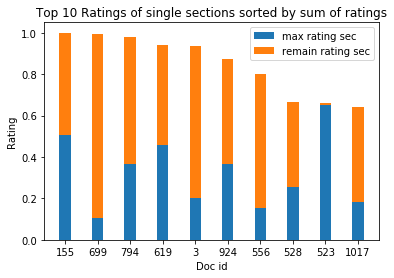

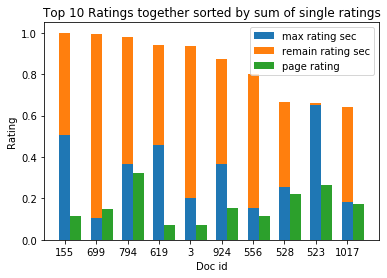

In [3]:
test = Loader("data/page_game.txt", "data/section_game.txt")
test.show_only_sec_sorted_by_sum(10, "2000")
test.show_together_sorted_by_sum(10, "2000")

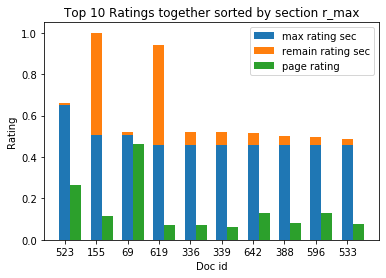

In [4]:
test.show_together_ordered_by_max_r(10, "ordered_by_rmax")

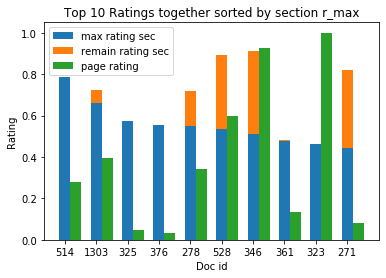

In [6]:
test = Loader("data/page_game_&_team_&_ball.txt", "data/section_game_&_team_&_ball.txt")
test.show_together_ordered_by_max_r(10, "tripe_ordered_by_rmax")